In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from skelm import ELMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset using pandas and assigning the dataset to ship_data
ship_data = pd.read_csv("Group_10_data.csv",header=None)

In [3]:
# Adding colimn names to the dataset
ship_data.columns = ['lp','speed','GT_shaft_torque','GT_rpm','GG_rpm','Starboard_prop_torq','port_prop_torque','HP_exit_temp','GT_comp_in_temp','GT_comp_out_temp','HP_Turb_exit_pres','GT_Comp_in_pres','GT_Comp_out_pres','GT_Ex_Pres','TIC','mf','GT_Comp_decay_coeff','GT_Turb_decay_coeff']

In [4]:
ship_data.head()

,lp,speed,GT_shaft_torque,GT_rpm,GG_rpm,Starboard_prop_torq,port_prop_torque,HP_exit_temp,GT_comp_in_temp,GT_comp_out_temp,HP_Turb_exit_pres,GT_Comp_in_pres,GT_Comp_out_pres,GT_Ex_Pres,TIC,mf,GT_Comp_decay_coeff,GT_Turb_decay_coeff
0,1.14,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,288.0,551.0,1.10,0.998,5.95,1.02,7.14,0.082,0.95,0.975
1,2.09,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,288.0,582.0,1.33,0.998,7.28,1.02,10.70,0.287,0.95,0.975
2,3.14,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,288.0,588.0,1.39,0.998,7.57,1.02,13.10,0.259,0.95,0.975
3,4.16,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,288.0,614.0,1.66,0.998,9.01,1.02,18.10,0.358,0.95,0.975
4,5.14,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,288.0,646.0,2.08,0.998,11.20,1.03,26.40,0.522,0.95,0.975


In [5]:
ship_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lp                   11934 non-null  float64
 1   speed                11934 non-null  float64
 2   GT_shaft_torque      11934 non-null  float64
 3   GT_rpm               11934 non-null  float64
 4   GG_rpm               11934 non-null  float64
 5   Starboard_prop_torq  11934 non-null  float64
 6   port_prop_torque     11934 non-null  float64
 7   HP_exit_temp         11934 non-null  float64
 8   GT_comp_in_temp      11934 non-null  float64
 9   GT_comp_out_temp     11934 non-null  float64
 10  HP_Turb_exit_pres    11934 non-null  float64
 11  GT_Comp_in_pres      11934 non-null  float64
 12  GT_Comp_out_pres     11934 non-null  float64
 13  GT_Ex_Pres           11934 non-null  float64
 14  TIC                  11934 non-null  float64
 15  mf                   11934 non-null 

In [6]:
# Checking if there are any missing values
# Output gves number of null values present in the dataset
null_values = ship_data.isnull()
null_value_count = np.count_nonzero(null_values == True)
null_value_count

0

In [7]:
ship_data.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
lp,11934.0,5.168,2.627,1.140,3.140,5.140,7.150,9.300
speed,11934.0,15.000,7.746,3.000,9.000,15.000,21.000,27.000
GT_shaft_torque,11934.0,27249.166,22159.092,254.000,8380.000,21600.000,39000.000,72800.000
GT_rpm,11934.0,2137.178,774.185,1310.000,1390.000,1920.000,2680.000,3560.000
GG_rpm,11934.0,8200.955,1091.298,6590.000,7060.000,8480.000,9130.000,9800.000
Starboard_prop_torq,11934.0,227.298,200.487,5.300,60.300,175.000,332.000,645.000
port_prop_torque,11934.0,227.298,200.487,5.300,60.300,175.000,332.000,645.000
HP_exit_temp,11934.0,735.496,173.680,442.000,590.000,706.000,834.000,1120.000
GT_comp_in_temp,11934.0,288.000,0.000,288.000,288.000,288.000,288.000,288.000
GT_comp_out_temp,11934.0,646.215,72.677,540.000,578.000,637.000,694.000,789.000


# Checking redundant columns
GT Compressor Inlet Air Temperature and GT Compressor Inlet Air Pressure have zero-variances. 
This means they are constant numbers which are not important variables that effect on our final result.
So, will be removed from the data.

And Starboard_prop_torq and port_prop_torque columns have same values in the entire dataframe.
This means one column is redundant. So, one of the columns will be removed

In [8]:
# checking linearity between lp and speed
LiR_v = sm.OLS(ship_data['speed'], sm.add_constant(ship_data['lp'])).fit()
LiR_v.summary()
# r-squared value is 1. So having both columns to model is redundant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.315e+07
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:22:57   Log-Likelihood:                 10675.
No. Observations:               11934   AIC:                        -2.135e+04
Df Residuals:                   11932   BIC:                        -2.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2367      0.002   -118.445      0.000      -0.241      -0.233
lp             2.9484      0.000   8552.924      0.000       2.948       2.949
==============================================================================
Omnibus:                      740.271   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.723
Skew:                          -0.387   Prob(JB):                    3.06e-109
Kurtosis:                       2.364   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Removing speed, port_prop_torque, GT_comp_in_temp, GT_Comp_in_pres columns
ship_data = ship_data.drop(["GT_comp_in_temp","speed","port_prop_torque","GT_Comp_in_pres"],axis=1)

In [10]:
ship_data.columns

Index(['lp', 'GT_shaft_torque', 'GT_rpm', 'GG_rpm', 'Starboard_prop_torq',
       'HP_exit_temp', 'GT_comp_out_temp', 'HP_Turb_exit_pres',
       'GT_Comp_out_pres', 'GT_Ex_Pres', 'TIC', 'mf', 'GT_Comp_decay_coeff',
       'GT_Turb_decay_coeff'],
      dtype='object')

<Axes: >

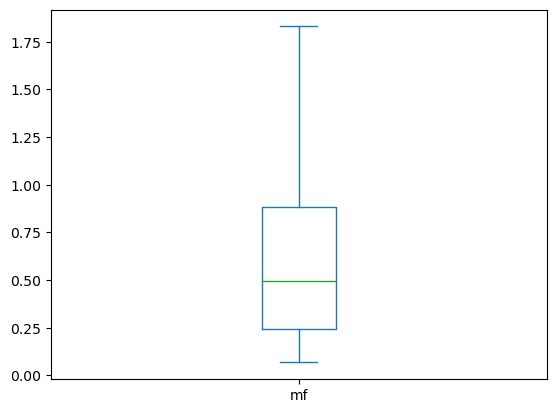

In [11]:
ship_data['mf'].plot(kind = 'box')

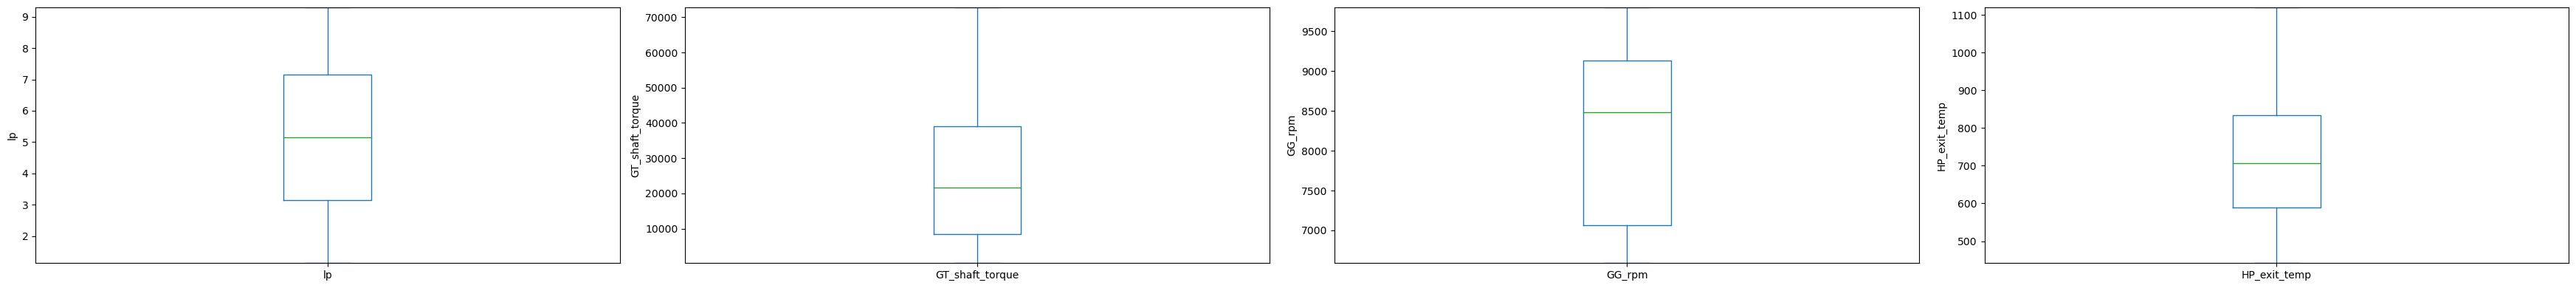

In [12]:
# Plotting box plots to check for any outliers
selection = ['lp','GT_shaft_torque','GG_rpm','HP_exit_temp']
fig, ax = plt.subplots(1, len(selection), figsize=(35, len(selection)))
i = 0
for col in selection:
    axo = ship_data[col].plot(kind='box', ax=ax[i], showfliers=False)
    axo.set_ylim(ship_data[col].min(), ship_data[col].max())
    axo.set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

In [13]:
# creating features array and output arrays
X = ship_data.iloc[:,:-2].values
y1 = ship_data.iloc[:,-2].values
y2 = ship_data.iloc[:,-1].values

In [14]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X,y1,y2,test_size=0.2,random_state=42)

In [15]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# All the models we built for predicting y1

reg_1_1 = ELMRegressor(ufunc = 'relu', n_neurons = 50, alpha = 1e-07)
reg_1_2 = SVR(kernel = 'rbf', gamma = 0.01, epsilon = 0.0005)
reg_1_3 = SVR(kernel = 'linear', epsilon = 0.001)
reg_1_4 = DecisionTreeRegressor(max_depth = 31, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5)
reg_1_5 = KNeighborsRegressor(n_neighbors = 3, p = 1, weights = 'distance')
reg_1_6 = LinearRegression()
reg_1_7 = RandomForestRegressor(n_estimators = 700, min_samples_split = 5,min_samples_leaf = 1,max_features = 'sqrt',max_depth = 50,bootstrap = True)

In [25]:
# All the models we built for predicting y2

reg_2_1 = ELMRegressor(ufunc = 'tanh', n_neurons = 50, alpha = 1e-07)
reg_2_2 = SVR(kernel = 'rbf', gamma = 0.01, epsilon = 0.0005)
reg_2_3 = SVR(kernel = 'linear', epsilon = 0.001)
reg_2_4 = DecisionTreeRegressor(max_depth = 31, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
reg_2_5 = KNeighborsRegressor(n_neighbors = 3, p = 1, weights = 'distance')
reg_2_6 = LinearRegression()
reg_2_7 = RandomForestRegressor(n_estimators = 900, min_samples_split = 5, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 40, bootstrap = False)

In [26]:
mean_squared_error_1 = []
r_scores_1 = []
for reg, name in zip([reg_1_1, reg_1_2, reg_1_3, reg_1_4, reg_1_5, reg_1_6, reg_1_7], ['ELM', 'SVR_non_lin', 'SVR_linear', 'DTR', 'KNN', 'Linear', 'RF']):
    reg.fit(X_train, y1_train)
    print(name,'Training r2_score:', reg.score(X_train, y1_train))
    print(name, 'Test r2_score:', reg.score(X_test, y1_test), '\n')
    r2_scores_1 = np.round(reg.score(X_test,y1_test),3)
    mse_1 = np.round(mean_squared_error(y1_test,reg.predict(X_test)),8)
    r_scores_1.append(r2_scores_1)
    mean_squared_error_1.append(mse_1)

ELM Training r2_score: 0.9922361930613898
ELM Test r2_score: 0.9919671963971758 

SVR_non_lin Training r2_score: 0.9888470793078061
SVR_non_lin Test r2_score: 0.9878577509343103 

SVR_linear Training r2_score: 0.8487387256459848
SVR_linear Test r2_score: 0.8505380607555744 

DTR Training r2_score: 0.9949732716476677
DTR Test r2_score: 0.9739804816967552 

KNN Training r2_score: 0.998916301522187
KNN Test r2_score: 0.9873625513597493 

Linear Training r2_score: 0.8551010609234786
Linear Test r2_score: 0.8560635438399524 

RF Training r2_score: 0.9961932380893884
RF Test r2_score: 0.9899022076219653 



In [27]:
print(mean_squared_error_1)
print(r_scores_1)

[1.73e-06, 2.61e-06, 3.213e-05, 5.59e-06, 2.72e-06, 3.094e-05, 2.17e-06]
[0.992, 0.988, 0.851, 0.974, 0.987, 0.856, 0.99]


In [28]:
mean_squared_error_2 = []
r_scores_2 = []
for reg, name in zip([reg_2_1, reg_2_2, reg_2_3, reg_2_4, reg_2_5, reg_2_6, reg_2_7], ['ELM', 'SVR_non_lin', 'SVR_linear', 'DTR', 'KNN', 'Linear', 'RF']):
    reg.fit(X_train, y2_train)
    print(name,'Training r2_score:', reg.score(X_train, y2_train))
    print(name, 'Test r2_score:', reg.score(X_test, y2_test), '\n')
    r2_scores_2 = np.round(reg.score(X_test,y2_test),3)
    mse_2 = np.round(mean_squared_error(y2_test,reg.predict(X_test)),8)
    r_scores_2.append(r2_scores_2)
    mean_squared_error_2.append(mse_2)

ELM Training r2_score: 0.9850499172599634
ELM Test r2_score: 0.984981202531806 

SVR_non_lin Training r2_score: 0.9566101280841829
SVR_non_lin Test r2_score: 0.9577716210339695 

SVR_linear Training r2_score: 0.8823941727069703
SVR_linear Test r2_score: 0.8807356667391377 

DTR Training r2_score: 0.9960887609218855
DTR Test r2_score: 0.9441667174539718 

KNN Training r2_score: 0.9989114632176909
KNN Test r2_score: 0.9737199180984042 

Linear Training r2_score: 0.8853280436434873
Linear Test r2_score: 0.8839945444140384 

RF Training r2_score: 0.996042071852381
RF Test r2_score: 0.9830984406157102 



In [29]:
print(mean_squared_error_2)
print(r_scores_2)

[8.6e-07, 2.41e-06, 6.8e-06, 3.18e-06, 1.5e-06, 6.61e-06, 9.6e-07]
[0.985, 0.958, 0.881, 0.944, 0.974, 0.884, 0.983]


#### Random forest is best model in predicting both y1 and y2 after first variable selection method. The results of the model are appended into all models results

In [30]:
# The data frame will be different which is:
X1 = ship_data[['lp', 'GT_shaft_torque', 'GT_rpm', 'GG_rpm', 'GT_Ex_Pres', 'TIC']]

# Splitting data
X1_train,X1_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X1,y1,y2,test_size=0.2,random_state=42)

# Feature scaling using standard scaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [32]:
corr_RF_1 = RandomForestRegressor(n_estimators = 700,
 min_samples_split = 5,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = True)

corr_RF_2 = RandomForestRegressor(n_estimators = 900,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 40,
 bootstrap = False)

# fitting the data 
corr_RF_1.fit(X1_train, y1_train)
corr_RF_2.fit(X1_train, y2_train)

# predicting the output values 
corr_rf_y1_pred = corr_RF_1.predict(X1_test)
corr_rf_y2_pred = corr_RF_2.predict(X1_test)

# calculating mean squared error
corr_rf_mse1 = mean_squared_error(y1_test,corr_rf_y1_pred)
corr_rf_mse2 = mean_squared_error(y2_test,corr_rf_y2_pred)
# calculating r2 score
corr_rf_r_score_1 = r2_score(y1_test,corr_rf_y1_pred)
corr_rf_r_score_2 = r2_score(y2_test,corr_rf_y2_pred)

r_scores_2.append(np.round(corr_rf_r_score_2,3))
mean_squared_error_2.append(np.round(corr_rf_mse2,8))

r_scores_1.append(np.round(corr_rf_r_score_1,3))
mean_squared_error_1.append(np.round(corr_rf_mse1,8))

#### Random forest is best model in predicting both y1 and y2 after second variable selection method(Bidirectional). The results of the model are appended into all models results. Here the variables are different for y1 and y2 predictions

In [33]:
# The data frame will be different which is:
X2 = ship_data[['lp', 'GT_shaft_torque', 'GG_rpm', 'HP_exit_temp', 'GT_comp_out_temp', 'HP_Turb_exit_pres', 'GT_Comp_out_pres',
 'GT_Ex_Pres', 'mf']]

X3 = ship_data[['GT_shaft_torque', 'GG_rpm', 'Starboard_prop_torq', 'HP_exit_temp', 'GT_comp_out_temp', 'HP_Turb_exit_pres',
 'GT_Comp_out_pres', 'TIC', 'mf']]

# Splitting data
X2_train,X2_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X2,y1,y2,test_size=0.2,random_state=42)

X3_train,X3_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X3,y1,y2,test_size=0.2,random_state=42)

# Feature scaling using standard scaler
sc1 = StandardScaler()
X2_train = sc1.fit_transform(X2_train)
X2_test = sc1.transform(X2_test)

sc2 = StandardScaler()
X3_train = sc2.fit_transform(X3_train)
X3_test = sc2.transform(X3_test)

In [34]:
sfs_RF_1 = RandomForestRegressor(n_estimators = 700,
 min_samples_split = 5,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = True)

sfs_RF_2 = RandomForestRegressor(n_estimators = 900,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 40,
 bootstrap = False)

# fitting the data 
sfs_RF_1.fit(X2_train, y1_train)
sfs_RF_2.fit(X3_train, y2_train)

# predicting the output values 
sfs_rf_y1_pred = sfs_RF_1.predict(X2_test)
sfs_rf_y2_pred = sfs_RF_2.predict(X3_test)

# calculating mean squared error
sfs_rf_mse1 = mean_squared_error(y1_test,sfs_rf_y1_pred)
sfs_rf_mse2 = mean_squared_error(y2_test,sfs_rf_y2_pred)
# calculating r2 score
sfs_rf_r_score_1 = r2_score(y1_test,sfs_rf_y1_pred)
sfs_rf_r_score_2 = r2_score(y2_test,sfs_rf_y2_pred)

r_scores_2.append(np.round(sfs_rf_r_score_2,3))
mean_squared_error_2.append(np.round(sfs_rf_mse2,8))

r_scores_1.append(np.round(sfs_rf_r_score_1,3))
mean_squared_error_1.append(np.round(sfs_rf_mse1,8))

In [35]:
print(r_scores_1)

[0.992, 0.988, 0.851, 0.974, 0.987, 0.856, 0.99, 0.964, 0.991]


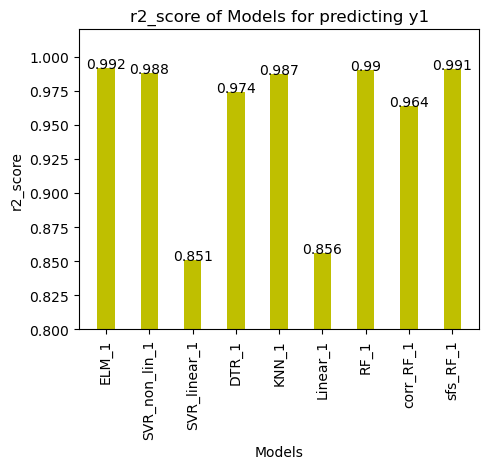

In [36]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM_1', 'SVR_non_lin_1', 'SVR_linear_1', 'DTR_1', 'KNN_1', 'Linear_1', 'RF_1', 'corr_RF_1', 'sfs_RF_1']
ax.set_ylabel('r2_score')
ax.set_xlabel('Models')
ax.set_title('r2_score of Models for predicting y1')
ax.bar(models,r_scores_1, color='y', width=0.4)
ax.set_xticklabels(labels=models,rotation = 90)
ax.set_ybound(lower=0.80, upper=1.02 )
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,r_scores_1)
plt.show()

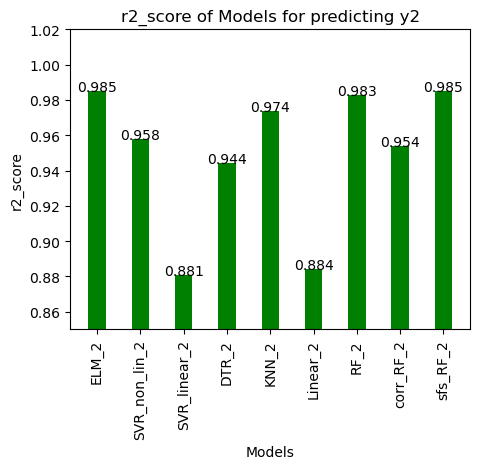

In [37]:
fig = plt.figure(figsize = (4, 3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM_2', 'SVR_non_lin_2', 'SVR_linear_2', 'DTR_2', 'KNN_2', 'Linear_2', 'RF_2', 'corr_RF_2', 'sfs_RF_2']
ax.set_ylabel('r2_score')
ax.set_xlabel('Models',)
ax.set_title('r2_score of Models for predicting y2')
ax.bar(models,r_scores_2, color='g', width=0.4)
ax.set_xticklabels(labels=models,rotation = 90)
ax.set_ybound(lower=0.85, upper=1.02 )
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,r_scores_2)
plt.show()

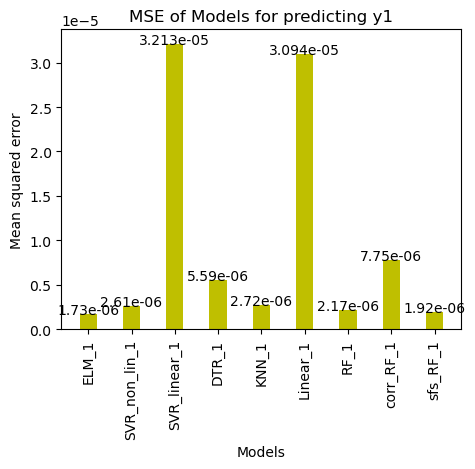

In [38]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM_1', 'SVR_non_lin_1', 'SVR_linear_1', 'DTR_1', 'KNN_1', 'Linear_1', 'RF_1','corr_RF_1', 'sfs_RF_1']
ax.set_ylabel('Mean squared error')
ax.set_xlabel('Models')
ax.set_title('MSE of Models for predicting y1')
ax.bar(models,mean_squared_error_1, color='y', width=0.4)
ax.set_xticklabels(labels=models,rotation = 90)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,mean_squared_error_1)
plt.show()

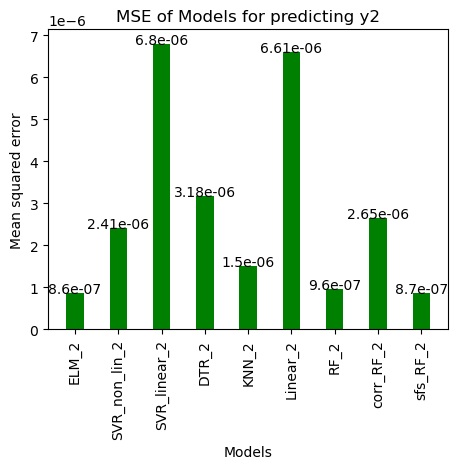

In [39]:
fig = plt.figure(figsize = (4, 3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM_2', 'SVR_non_lin_2', 'SVR_linear_2', 'DTR_2', 'KNN_2', 'Linear_2', 'RF_2', 'corr_RF_2', 'sfs_RF_2']
ax.set_ylabel('Mean squared error')
ax.set_xlabel('Models',)
ax.set_title('MSE of Models for predicting y2')
ax.bar(models,mean_squared_error_2, color='g', width=0.4)
ax.set_xticklabels(labels=models,rotation = 90)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,mean_squared_error_2)
plt.show()

### Conclusion: We can see Extreme learning machine algorithm and Random Forest algorithm are best among all the algorithm. Now lets try variable selection.

In [40]:
X = ship_data.iloc[:,:-2]

In [41]:
X.head()

,lp,GT_shaft_torque,GT_rpm,GG_rpm,Starboard_prop_torq,HP_exit_temp,GT_comp_out_temp,HP_Turb_exit_pres,GT_Comp_out_pres,GT_Ex_Pres,TIC,mf
0,1.14,290.0,1350.0,6680.0,7.58,464.0,551.0,1.10,5.95,1.02,7.14,0.082
1,2.09,6960.0,1380.0,6830.0,28.20,635.0,582.0,1.33,7.28,1.02,10.70,0.287
2,3.14,8380.0,1390.0,7110.0,60.40,606.0,588.0,1.39,7.57,1.02,13.10,0.259
3,4.16,14700.0,1550.0,7790.0,114.00,661.0,614.0,1.66,9.01,1.02,18.10,0.358
4,5.14,21600.0,1920.0,8490.0,175.00,731.0,646.0,2.08,11.20,1.03,26.40,0.522


In [42]:
corr = X.corr()

<Axes: >

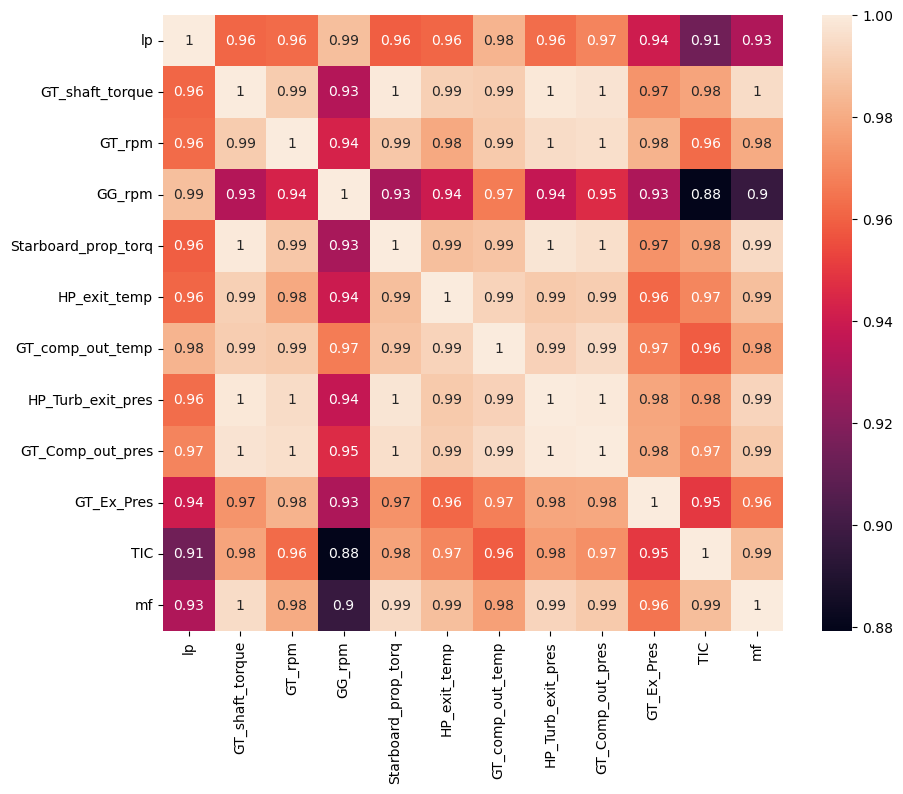

In [44]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [45]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.99:
            if columns[j]:
                columns[j] = False

In [46]:
# taking the features for which correlation coefficient is less than 0.99
selected_columns = X.columns[columns]
selected_columns.shape

(6,)

In [47]:
selected_columns

Index(['lp', 'GT_shaft_torque', 'GT_rpm', 'GG_rpm', 'GT_Ex_Pres', 'TIC'], dtype='object')

In [48]:
X = ship_data[selected_columns]
y1 = ship_data.iloc[:,-2].values
y2 = ship_data.iloc[:,-1].values

In [49]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X,y1,y2,test_size=0.2,random_state=42)

In [50]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:

from sklearn.ensemble import RandomForestRegressor

corr_RF_1 = RandomForestRegressor(n_estimators = 700,
 min_samples_split = 5,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = True)

corr_RF_2 = RandomForestRegressor(n_estimators = 900,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 40,
 bootstrap = False)

In [52]:
# fitting the data 
corr_RF_1.fit(X_train, y1_train)
corr_RF_2.fit(X_train, y2_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=900)

In [53]:
# predicting the output values 
corr_rf_y1_pred = corr_RF_1.predict(X_test)
corr_rf_y2_pred = corr_RF_2.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
# calculating mean squared error
corr_rf_mse1 = mean_squared_error(y1_test,corr_rf_y1_pred)
corr_rf_mse2 = mean_squared_error(y2_test,corr_rf_y2_pred)
# calculating r2 score
corr_rf_r_score_1 = r2_score(y1_test,corr_rf_y1_pred)
corr_rf_r_score_2 = r2_score(y2_test,corr_rf_y2_pred)

In [55]:
print(f' mse_1: {corr_rf_mse1}')
print(f' mse_2: {corr_rf_mse2}')
print(f' r_score_1: {corr_rf_r_score_1}')
print(f' r_score_2: {corr_rf_r_score_2}')

 mse_1: 7.776727298557816e-06
 mse_2: 2.6216830930342453e-06
 r_score_1: 0.9638245000524799
 r_score_2: 0.9539924135053842


In [56]:
#pip install Scikit-ELM
from skelm import ELMRegressor

In [57]:
# Since we have 2 values to predict, we built 2 different model in part 3. The best models from part 3 are
corr_ELM_1 = ELMRegressor(ufunc = 'relu', n_neurons = 50, alpha = 1e-07)
corr_ELM_2 = ELMRegressor(ufunc = 'tanh', n_neurons = 50, alpha = 1e-07)

In [58]:
# fitting the data 
corr_ELM_1.fit(X_train, y1_train)
corr_ELM_2.fit(X_train, y2_train)

ELMRegressor(n_neurons=50)

In [59]:
# predicting the output values
corr_ELM_y1_pred = corr_ELM_1.predict(X_test)
corr_ELM_y2_pred = corr_ELM_2.predict(X_test)

In [62]:
# calculating mean squared error
corr_ELM_mse1 = mean_squared_error(y1_test,corr_ELM_y1_pred)
corr_ELM_mse2 = mean_squared_error(y2_test,corr_ELM_y2_pred)
# calculating r2 score
corr_ELM_r_score_1 = r2_score(y1_test,corr_ELM_y1_pred)
corr_ELM_r_score_2 = r2_score(y2_test,corr_ELM_y2_pred)

In [61]:
print(f' mse_1: {corr_ELM_mse1}')
print(f' mse_2: {corr_ELM_mse2}')
print(f' r_score_1: {corr_ELM_r_score_1}')
print(f' r_score_2: {corr_ELM_r_score_2}')

 mse_1: 4.458904740329569e-05
 mse_2: 1.2297532850067798e-05
 r_score_1: 0.7925822752847422
 r_score_2: 0.784192144438381


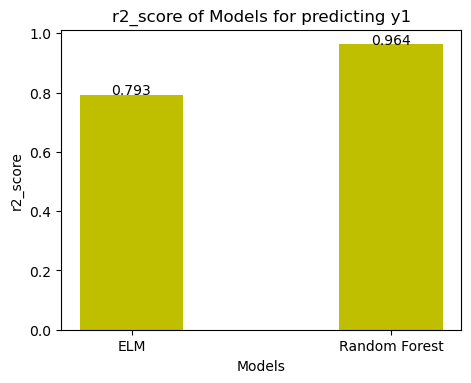

In [63]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM', 'Random Forest']
students = np.round([corr_ELM_r_score_1,corr_rf_r_score_1],3)
ax.set_ylabel('r2_score')
ax.set_xlabel('Models',)
ax.set_title('r2_score of Models for predicting y1')
ax.bar(models,students, color='y', width=0.4)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,students)
plt.show()

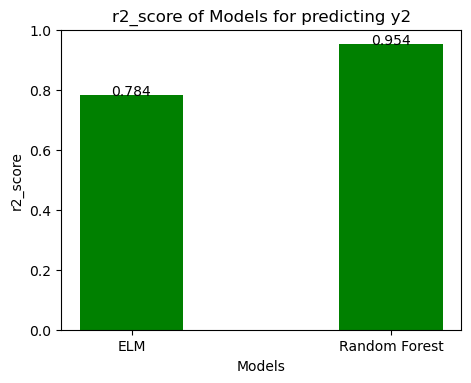

In [64]:
fig = plt.figure(figsize = (4, 3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM', 'Random Forest']
students = np.round([corr_ELM_r_score_2,corr_rf_r_score_2],3)
ax.set_ylabel('r2_score')
ax.set_xlabel('Models',)
ax.set_title('r2_score of Models for predicting y2')
ax.bar(models,students, color='g', width=0.4)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,students)
plt.show()

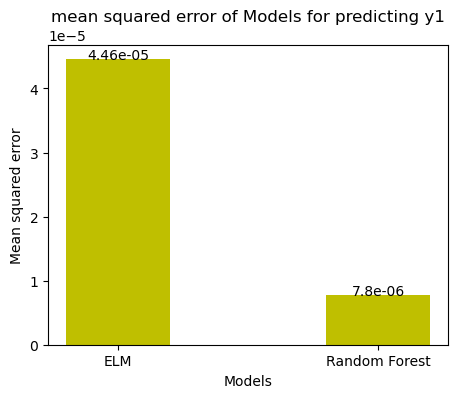

In [65]:
fig = plt.figure(figsize = (4, 3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM', 'Random Forest']
students = np.round([corr_ELM_mse1,corr_rf_mse1],7)
ax.set_ylabel('Mean squared error')
ax.set_xlabel('Models',)
ax.set_title('mean squared error of Models for predicting y1')
ax.bar(models,students, color='y', width=0.4)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,students)
plt.show()

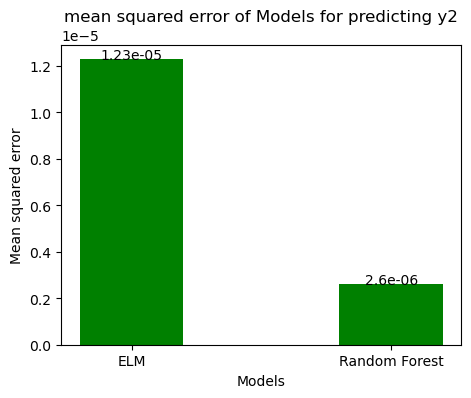

In [66]:
fig = plt.figure(figsize = (4, 3))
ax = fig.add_axes([0,0,1,1])
models = ['ELM', 'Random Forest']
students = np.round([corr_ELM_mse2, corr_rf_mse2],7)
ax.set_ylabel('Mean squared error')
ax.set_xlabel('Models',)
ax.set_title('mean squared error of Models for predicting y2')
ax.bar(models,students, color='g', width=0.4)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(models,students)
plt.show()